#Academic Integrity:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [ ]:
#loading data
penguin = pd.read_csv("penguins.csv")

In [ ]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
penguin.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

In [ ]:
penguin.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [ ]:
penguin.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [ ]:
penguin.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


species              AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdel...
island               TorgersenTorgersenTorgersenTorgersenTorgersenT...
bill_length_mm                                                 15021.3
bill_depth_mm                                                   5865.7
flipper_length_mm                                              68713.0
body_mass_g                                                  1437000.0
year                                                            690762
dtype: object

In [ ]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
# Because we see several (but not an overwhelming number of) lines that have null values, we will drop the lines with null values
penguin.dropna(inplace=True)
penguin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
# We see that we have three columns with string (object) values that need to be changed to numerical values
# This process starts by identifying the unique values for each set
print("Species:",penguin.species.unique())
print("Island:",penguin.island.unique())
print("Sex:",penguin.sex.unique())

Species: ['Adelie' 'Gentoo' 'Chinstrap']
Island: ['Torgersen' 'Biscoe' 'Dream']
Sex: ['male' 'female']


In [ ]:
# We then map the unique values of each of these columns to numerical values
# Since these variables have a small set of values, we can easily normalize them manually
penguin['species'] = penguin['species'].map({
    'Adelie': 0,
    'Gentoo': 0.5,
    'Chinstrap': 1
})
penguin['island'] = penguin['island'].map({
    'Torgersen': 0,
    'Biscoe': 0.5,
    'Dream': 1
})
penguin['sex'] = penguin['sex'].map({
    'male': 0,
    'female': 1
})

# Running describe() will show that the values have successfully been changed to numerical values, as well as provide insight to the distribution
penguin.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.382883,0.614114,43.992793,17.164865,200.966967,4207.057057,0.495495,2008.042042
std,0.383910,0.339044,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,0.000000,0.500000,39.500000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,0.500000,0.500000,44.500000,17.300000,197.000000,4050.000000,0.000000,2008.000000
75%,0.500000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,2009.000000
max,1.000000,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


In [ ]:
# Our next step is to normalize the data
# Looking at the above description, we need to normalize bill length & depth, flipper length, body mass and year
# Bill Length
penguin.bill_length_mm = penguin.bill_length_mm.apply(lambda x: (x - penguin.bill_length_mm.min()) / (penguin.bill_length_mm.max() - penguin.bill_length_mm.min()))
# Bill Depth
penguin.bill_depth_mm = penguin.bill_depth_mm.apply(lambda x: (x - penguin.bill_depth_mm.min()) / (penguin.bill_depth_mm.max() - penguin.bill_depth_mm.min()))
# Flipper Length
penguin.flipper_length_mm = penguin.flipper_length_mm.apply(lambda x: (x - penguin.flipper_length_mm.min()) / (penguin.flipper_length_mm.max() - penguin.flipper_length_mm.min()))
# Body Mass
penguin.body_mass_g = penguin.body_mass_g.apply(lambda x: (x - penguin.body_mass_g.min()) / (penguin.body_mass_g.max() - penguin.body_mass_g.min()))
# Year
penguin.year = penguin.year.apply(lambda x: (x - penguin.year.min()) / (penguin.year.max() - penguin.year.min()))

# Run another describe() to make sure all minima are zero and all maxima are one
penguin.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.382883,0.614114,0.432465,0.483912,0.490966,0.418627,0.495495,0.521021
std,0.383910,0.339044,0.198861,0.234433,0.237555,0.223671,0.500732,0.406472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.269091,0.297619,0.305085,0.236111,0.000000,0.000000
50%,0.500000,0.500000,0.450909,0.500000,0.423729,0.375000,0.000000,0.500000
75%,0.500000,1.000000,0.600000,0.666667,0.694915,0.576389,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking to see if there is any clear correlation between variables
penguin_corr = penguin.corr()
print(penguin_corr)

                    species    island  bill_length_mm  bill_depth_mm  \
species            1.000000  0.450097        0.777473      -0.173789   
island             0.450097  1.000000        0.212038       0.189636   
bill_length_mm     0.777473  0.212038        1.000000      -0.228626   
bill_depth_mm     -0.173789  0.189636       -0.228626       1.000000   
flipper_length_mm  0.346061 -0.162739        0.653096      -0.577792   
body_mass_g        0.199259 -0.201966        0.589451      -0.472016   
sex               -0.002753 -0.005834       -0.344078      -0.372673   
year              -0.032431 -0.028387        0.032657      -0.048182   

                   flipper_length_mm  body_mass_g       sex      year  
species                     0.346061     0.199259 -0.002753 -0.032431  
island                     -0.162739    -0.201966 -0.005834 -0.028387  
bill_length_mm              0.653096     0.589451 -0.344078  0.032657  
bill_depth_mm              -0.577792    -0.472016 -0.372673 -0.

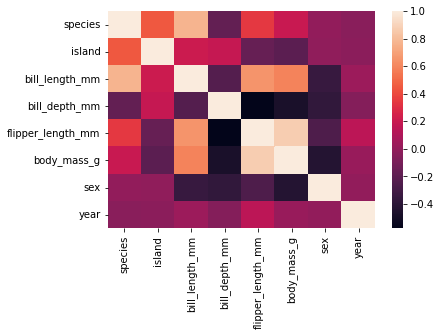

In [ ]:
plt.show(snb.heatmap(penguin_corr))

In [ ]:
# We shuffle and reindex the dataframe to make it easier to split into several groups for training and testing
# Reindexing is necessary because of the skipped indices from dropping the null value rows
penguin = penguin.sample(frac=1).reset_index(drop=True)
penguin.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
328,0.0,1.0,0.327273,0.595238,0.559322,0.444444,0,0.5
329,0.0,0.0,0.436364,0.583333,0.644068,0.361111,0,1.0
330,0.5,0.5,0.585455,0.142857,0.644068,0.527778,1,0.0
331,0.5,0.5,0.476364,0.202381,0.677966,0.694444,1,1.0
332,0.5,0.5,0.567273,0.226190,0.745763,0.569444,1,0.5


In [ ]:
# Need to split the dataset into training and testing sections
# Need to also convert from DataFrame to array and make sure matrix dimensions are correct
X_train = penguin.iloc[0:266,:].drop(columns=['sex']).T.to_numpy()
y_train = penguin['sex'].iloc[0:266]
y_train = np.reshape(y_train.array,(1,266))
print(X_train.shape)
print(y_train.shape)

(7, 266)
(1, 266)


In [ ]:
X_test = penguin.iloc[266:,:].drop(columns=['sex']).T.to_numpy()
y_test = penguin['sex'].iloc[266:]
y_test = np.reshape(y_test.array,(1,67))
print(X_test.shape)
print(y_test.shape)

(7, 67)
(1, 67)


In [ ]:
class LogitRegression:
    def __init__(self, learn_rate, iterations):
        self.lr = learn_rate
        self.it = iterations
        self.loss = []
    
    def sigmoid(self,z):
        #z = z.astype(float)
        return 1 / (1 + np.exp(-z))
    
    def cost(self,N,y_train,y_pred):
        Jw = (1/N)*np.sum(-y_train*np.log(y_pred) - (1-y_train)*np.log(1-y_pred))
        return Jw
    
    def gradient_descent(self,weights,x_train,y_train,bias):
        wtxb = np.dot(weights.T,x_train) + bias
        wtxb = wtxb.astype(float)
        y_pred = self.sigmoid(wtxb)
        delta =  y_pred - y_train
        N = X_train.shape[1]
        #dW = np.dot(delta,np.transpose(x_train)/N
        dW = np.dot(delta,x_train.T)/N
        dB = np.sum(delta)/N
        cost = self.cost(N,y_train,y_pred)
        return dW, dB, cost
    
    def fit(self,x_train,y_train):
        d = x_train.shape[0]
        weights = np.reshape(np.random.uniform(0,1,d),(d,1))
        bias = -0.5
        
        for i in range(self.it):
            dW, dB, cost = self.gradient_descent(weights,x_train,y_train,bias)
            weights = weights - self.lr*dW.T
            bias = bias - self.lr*dB
            self.loss.append(cost)
            
            if(i%(self.it/100)==0):
                print("Cost after ",i,"iterations is : ",cost)
            
        self.weights = weights
        self.bias = bias
        return weights, bias,self.loss
    
    def predict(self,X):
        wtxb = np.dot(self.weights.T,X) + self.bias
        wtxb = wtxb.astype(float)
        y_pred = self.sigmoid(wtxb)
        '''
        if y_pred >= 0.5:
            result = 1
        else:
            result = 0
        '''
        y_pred = np.array(np.rint(y_pred),dtype="int64")
        return y_pred
        
        

In [ ]:
model = LogitRegression(0.001,1000000)
print(model.lr)
print(model.it)

w1, b1,cost_values = model.fit(X_train,y_train)
print(b1)
#print(w1)

0.001
1000000
Cost after  0 iterations is :  0.9172779248865182
Cost after  10000 iterations is :  0.6947289493595676
Cost after  20000 iterations is :  0.6578412878136966
Cost after  30000 iterations is :  0.6280387425606824
Cost after  40000 iterations is :  0.6026590849258454
Cost after  50000 iterations is :  0.5803565703261006
Cost after  60000 iterations is :  0.5603989771965413
Cost after  70000 iterations is :  0.542346187999693
Cost after  80000 iterations is :  0.5259041891727749
Cost after  90000 iterations is :  0.5108575318085113
Cost after  100000 iterations is :  0.4970370372200553
Cost after  110000 iterations is :  0.4843036055779277
Cost after  120000 iterations is :  0.4725395578506561
Cost after  130000 iterations is :  0.46164361140246746
Cost after  140000 iterations is :  0.4515276818327465
Cost after  150000 iterations is :  0.4421146558793597
Cost after  160000 iterations is :  0.43333672033874937
Cost after  170000 iterations is :  0.4251340384823896
Cost afte

In [ ]:
print(w1)

[[ 2.83838066]
 [-0.24040311]
 [-6.98898837]
 [-8.991599  ]
 [-0.6744496 ]
 [-7.96912383]
 [ 0.22639898]]


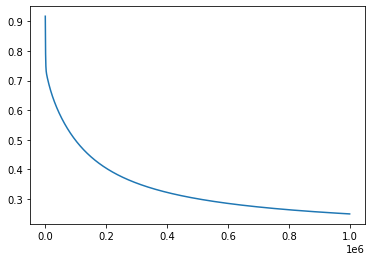

In [ ]:
epochs = [iter for iter in range(0,1000000)]
plt.plot(epochs,cost_values)

In [ ]:
print(model.loss[0])
print(model.loss[-1])

1.1171225535871006
0.24916792254016543


In [ ]:
y_test_pred = model.predict(X_test)

accuracy = 1 - np.sum(np.absolute(y_test_pred - y_test))/y_test.shape[1]
print(accuracy)

0.9104477611940298
